In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [2]:
pd.set_option("display.max_columns", 200)
pd.set_option('display.max_rows', 200)

In [3]:
# features2 = pd.read_csv('X:\Chess\data\\data_dump.csv')
# features2.index = features2['Date_UTC']
# del features2['Date_UTC']

In [4]:
# del features2['Date_UTC_y']

In [5]:
# features2.head()

,Bz,By,Bx,clock,AE,SymH,Vsw,Dsw,Psw,newell,GIC,GIC_QDC,STD,Points,Quality,NO._IMF_AVG__x,NO._IP_PLASMA_AVG__x,RMS__PHASE_FRONT_NORMAL_nT,MAG_AVG_B-VECTOR_nT_x,BX__GSE_nT_x,BY__GSE_nT_x,BZ__GSE_nT_x,BY__GSM_nT_x,BZ__GSM_nT_x,RMS_SD_B_SCALAR_nT_x,RMS_SD_FIELD_VECTOR_nT_x,FLOW_SPEED__GSE_km/s_x,VX_VELOCITY__GSE_km/s_x,VY_VELOCITY__GSE_km/s_x,VZ_VELOCITY__GSE_km/s_x,PROTON_DENSITY_n/cc_x,TEMPERATURE_K_x,NA/NP_RATIO__x,FLOW_PRESSURE_nPa_x,ELECTRIC_FIELD_mV/m_x,PLASMA_BETA__x,ALFVEN_MACH_NO.__x,1AU_IP_MAGNETOSONIC_MACH_NO.__x_x,X_(S/C)__GSE_Re_x,Y_(S/C)__GSE_Re_x,Z_(S/C)__GSE_Re_x,X_(BSN)__GSE_Re_x,Y_(BSN)__GSE_Re_x,Z_(BSN)__GSE_Re_x,1-M_AE_nT_x,1-M_AL-INDEX_nT_x,AU-INDEX_nT_x_x,SYM/D_INDEX_nT_x,SYM/H_INDEX_nT_x,ASY/D_INDEX_nT_x,ASY/H_INDEX_nT_x,BARTEL_#__x,NO._IMF_PTS_,NO._IP_PLASMA_PTS_,1AU_IP_MAG_AVG_B_nT_x,1AU_IP_MAG_AVG_B-VECTOR_nT_x,1AU_IP_LAT/THETA_AVG_B_Deg_x,1AU_IP_LONG/PHI_AVG_B_Deg_x,1AU_IP_BX__GSE_nT_x,1AU_IP_BY__GSE_nT_x,1AU_IP_BZ__GSE_nT_x,1AU_IP_BY__GSM_nT_x,1AU_IP_BZ__GSM_nT_x,RMSDEV_MAG_AVG_B_nT_x,RMSDEV_MAG_AVG_B-VCTR_nT_x,RMSDEV_BX_GSE_nT_x,RMSDEV_BY_GSE_nT_x,RMSDEV_BZ_GSE_nT_x,1AU_IP_PLASMA_TEMP_Deg_K_x,1AU_IP_N_(ION)_Per_cc_x,1AU_IP_PLASMA_SPEED_Km/s_x,1AU_IP_FLOW_LONG_Deg_x,1AU_IP_FLOW_LAT_Deg_x,1AU_IP_ALPHA/PROTON__x,1AU_IP_FLOW_PRESSURE_nPa_x,RMSDEV_TEMP_Deg_K_x,RMSDEV_N(ION)_Per_cc_x,RMSDEV_SPEED_Km/s_x,RMSDEV_FLOW_LONG_Deg_x,RMSDEV_FLOW_LAT_Deg_x,RMSDEV_A/P_RATIO__x,1AU_IP_ELECTRIC_FIELD_mV/m_x,1AU_IP_PLASMA_BETA__x,1AU_IP_ALFVEN_MACH_NO.__x,1AU_IP_MAGNETOSONIC_MACH_NO.__y_x,1AU_PROTONS>10_MEV_1/(SQcm-ster-s)_x,1AU_PROTONS>30_MEV_1/(SQcm-ster-s)_x,1AU_PROTONS>60_MEV_1/(SQcm-ster-s)_x,DAILY_SUNSPOT_NO__x,DAILY_F10.7__x,3-H_KP*10__x,1-H_DST_nT_x,1-H_AE_nT_x,3-H_AP_nT_x,1-H_AL-INDEX_nT_x,AU-INDEX_nT_y_x,1-H_PC(N)-INDEX__x,Date_UTC_x,NO._IMF_AVG__y,NO._IP_PLASMA_AVG__y,MAG_AVG_B-VECTOR_nT_y,BX__GSE_nT_y,BY__GSE_nT_y,BZ__GSE_nT_y,BY__GSM_nT_y,BZ__GSM_nT_y,RMS_SD_B_SCALAR_nT_y,RMS_SD_FIELD_VECTOR_nT_y,FLOW_SPEED__GSE_km/s_y,VX_VELOCITY__GSE_km/s_y,VY_VELOCITY__GSE_km/s_y,VZ_VELOCITY__GSE_km/s_y,PROTON_DENSITY_n/cc_y,TEMPERATURE_K_y,NA/NP_RATIO__y,FLOW_PRESSURE_nPa_y,ELECTRIC_FIELD_mV/m_y,PLASMA_BETA__y,ALFVEN_MACH_NO.__y,1AU_IP_MAGNETOSONIC_MACH_NO.__x_y,X_(S/C)__GSE_Re_y,Y_(S/C)__GSE_Re_y,Z_(S/C)__GSE_Re_y,X_(BSN)__GSE_Re_y,Y_(BSN)__GSE_Re_y,Z_(BSN)__GSE_Re_y,1-M_AE_nT_y,1-M_AL-INDEX_nT_y,AU-INDEX_nT_x_y,SYM/D_INDEX_nT_y,SYM/H_INDEX_nT_y,ASY/D_INDEX_nT_y,ASY/H_INDEX_nT_y,Extent_x,GEOLON_x,GEOLAT_x,MLT_x,MCOLAT_x,IGRF_DECL_x,SZA_x,dbn_nez_x,dbe_nez_x,dbz_nez_x,dbn_geo_x,dbe_geo_x,dbz_geo_x,MAGON_x,MAGLAT_x,BARTEL_#__y,1AU_IP_MAG_AVG_B_nT_y,1AU_IP_MAG_AVG_B-VECTOR_nT_y,1AU_IP_LAT/THETA_AVG_B_Deg_y,1AU_IP_LONG/PHI_AVG_B_Deg_y,1AU_IP_BX__GSE_nT_y,1AU_IP_BY__GSE_nT_y,1AU_IP_BZ__GSE_nT_y,1AU_IP_BY__GSM_nT_y,1AU_IP_BZ__GSM_nT_y,RMSDEV_MAG_AVG_B_nT_y,RMSDEV_MAG_AVG_B-VCTR_nT_y,RMSDEV_BX_GSE_nT_y,RMSDEV_BY_GSE_nT_y,RMSDEV_BZ_GSE_nT_y,1AU_IP_PLASMA_TEMP_Deg_K_y,1AU_IP_N_(ION)_Per_cc_y,1AU_IP_PLASMA_SPEED_Km/s_y,1AU_IP_FLOW_LONG_Deg_y,1AU_IP_FLOW_LAT_Deg_y,1AU_IP_ALPHA/PROTON__y,1AU_IP_FLOW_PRESSURE_nPa_y,RMSDEV_TEMP_Deg_K_y,RMSDEV_N(ION)_Per_cc_y,RMSDEV_SPEED_Km/s_y,RMSDEV_FLOW_LONG_Deg_y,RMSDEV_FLOW_LAT_Deg_y,RMSDEV_A/P_RATIO__y,1AU_IP_ELECTRIC_FIELD_mV/m_y,1AU_IP_PLASMA_BETA__y,1AU_IP_ALFVEN_MACH_NO.__y,1AU_IP_MAGNETOSONIC_MACH_NO.__y_y,1AU_PROTONS>10_MEV_1/(SQcm-ster-s)_y,1AU_PROTONS>30_MEV_1/(SQcm-ster-s)_y,1AU_PROTONS>60_MEV_1/(SQcm-ster-s)_y,DAILY_SUNSPOT_NO__y,DAILY_F10.7__y,3-H_KP*10__y,1-H_DST_nT_y,1-H_AE_nT_y,3-H_AP_nT_y,1-H_AL-INDEX_nT_y,AU-INDEX_nT_y_y,1-H_PC(N)-INDEX__y,dbz_nez_y,db_diff
Date_UTC,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2018-01-01 00:01:00,-5.0996,-4.754533,0.4300,3.891988,290.68,-4.76,371.540667,13.1088,3.6186,8053.182136,0.04,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

In [6]:
features2.columns

Index(['Bz', 'By', 'Bx', 'clock', 'AE', 'SymH', 'Vsw', 'Dsw', 'Psw', 'newell',
       ...
       'DAILY_F10.7__y', '3-H_KP*10__y', '1-H_DST_nT_y', '1-H_AE_nT_y',
       '3-H_AP_nT_y', '1-H_AL-INDEX_nT_y', 'AU-INDEX_nT_y_y',
       '1-H_PC(N)-INDEX__y', 'dbz_nez_y', 'db_diff'],
      dtype='object', length=194)

#### 10 years of data when ready

In [244]:
#scaled
# features = pd.read_csv('X:\\data_dumps\\features.csv')
# features.index = features['Date']
# del features['Date']

In [250]:
features2 = pd.read_csv('X:\\data_dumps\\10years.csv')
features2['Date'] = features2['Unnamed: 0']
features2.index = features2['Date']
del features2['Date']
del features2['Unnamed: 0']

In [252]:
features2.head()

,db_diff,DAILY_F10.7_,3-H_KP*10_,BY__GSE_nT,BZ__GSE_nT,1-H_AE_nT,SYM/H_INDEX_nT,RMS_SD_B_SCALAR_nT,RMS_SD_FIELD_VECTOR_nT,VY_VELOCITY__GSE_km/s,VZ_VELOCITY__GSE_km/s,PROTON_DENSITY_n/cc,FLOW_PRESSURE_nPa,ELECTRIC_FIELD_mV/m,PLASMA_BETA_,ALFVEN_MACH_NO._,AU-INDEX_nT_y,SYM/D_INDEX_nT,ASY/D_INDEX_nT,ASY/H_INDEX_nT,RMSDEV_MAG_AVG_B_nT
Date,,,,,,,,,,,,,,,,,,,,,
2009-01-01 00:00:00,NaN,-7,59,0.60,-0.85,-33,-13,0.00,0.16,4.8,-24.5,2.88,1.48,999.99,1.89,9.1,0.005982,0,13,12,0.3
2009-01-01 00:01:00,0.0,-7,59,1.19,-0.91,-33,-12,0.07,1.14,10.5,-25.0,2.89,1.48,0.28,1.87,9.0,0.005982,0,13,12,0.3
2009-01-01 00:02:00,0.0,-7,59,1.87,-0.94,-33,-12,0.01,0.27,5.2,-22.9,2.68,1.40,0.21,1.57,8.8,0.005982,0,14,12,0.3
2009-01-01 00:03:00,0.1,-7,59,1.70,-1.05,-33,-12,0.00,0.00,4.2,-22.7,2.66,1.39,0.29,1.52,8.7,0.005982,0,15,12,0.3
2009-01-01 00:04:00,0.0,-7,59,1.71,-0.88,-33,-12,0.02,0.03,8.2,-23.1,2.67,1.38,0.20,1.61,8.6,0.005982,0,15,12,0.3


In [253]:
# cols = list(features.columns.values)
# cols

In [254]:
# df = features2[[
#  'db_diff',
#  'NO._IMF_AVG_',
#  'NO._IP_PLASMA_AVG_',
#  'BX__GSE_nT',
#  'BY__GSE_nT',
#  'BZ__GSE_nT',
#  'BY__GSM_nT',
#  'BZ__GSM_nT',
#  'RMS_SD_B_SCALAR_nT',
#  'RMS_SD_FIELD_VECTOR_nT',
#  'VY_VELOCITY__GSE_km/s',
#  'VZ_VELOCITY__GSE_km/s',
#  'PROTON_DENSITY_n/cc',
#  'TEMPERATURE_K',
#  'NA/NP_RATIO_',
#  'FLOW_PRESSURE_nPa',
#  'ELECTRIC_FIELD_mV/m',
#  'PLASMA_BETA_',
#  'ALFVEN_MACH_NO._',
#  'Y_(S/C)__GSE_Re',
#  'Z_(S/C)__GSE_Re',
#  'Y_(BSN)__GSE_Re',
#  'Z_(BSN)__GSE_Re',
#  '1-M_AE_nT',
#  '1-M_AL-INDEX_nT',
#  'AU-INDEX_nT_x',
#  'SYM/D_INDEX_nT',
#  'ASY/D_INDEX_nT',
#  'ASY/H_INDEX_nT',
#  '1AU_IP_LAT/THETA_AVG_B_Deg',
#  '1AU_IP_LONG/PHI_AVG_B_Deg',
#  '1AU_IP_BX__GSE_nT',
#  '1AU_IP_BY__GSM_nT',
#  'RMSDEV_MAG_AVG_B_nT',
#  'RMSDEV_BX_GSE_nT',
#  'RMSDEV_BY_GSE_nT',
#  'RMSDEV_BZ_GSE_nT',
#  '1AU_IP_PLASMA_TEMP_Deg_K',
#  '1AU_IP_N_(ION)_Per_cc',
#  '1AU_IP_FLOW_LONG_Deg',
#  '1AU_IP_FLOW_LAT_Deg',
#  '1AU_IP_ALPHA/PROTON_',
#  'RMSDEV_TEMP_Deg_K',
#  'RMSDEV_N(ION)_Per_cc',
#  'RMSDEV_SPEED_Km/s',
#  'RMSDEV_FLOW_LONG_Deg',
#  'RMSDEV_FLOW_LAT_Deg',
#  'RMSDEV_A/P_RATIO_',
#  '1AU_IP_ELECTRIC_FIELD_mV/m',
#  '1AU_IP_PLASMA_BETA_',
#  '1AU_PROTONS>10_MEV_1/(SQcm-ster-s)',
#  '1AU_PROTONS>30_MEV_1/(SQcm-ster-s)',
#  '1AU_PROTONS>60_MEV_1/(SQcm-ster-s)',
#  'DAILY_F10.7_',
#  '3-H_KP*10_',
#  '1-H_DST_nT',
#  '1-H_AE_nT',
#  '3-H_AP_nT',
#  '1-H_AL-INDEX_nT',
#  '1-H_PC(N)-INDEX_',
#  'states']]

In [255]:
list(features2.columns)

['db_diff',
 'DAILY_F10.7_',
 '3-H_KP*10_',
 'BY__GSE_nT',
 'BZ__GSE_nT',
 '1-H_AE_nT',
 'SYM/H_INDEX_nT',
 'RMS_SD_B_SCALAR_nT',
 'RMS_SD_FIELD_VECTOR_nT',
 'VY_VELOCITY__GSE_km/s',
 'VZ_VELOCITY__GSE_km/s',
 'PROTON_DENSITY_n/cc',
 'FLOW_PRESSURE_nPa',
 'ELECTRIC_FIELD_mV/m',
 'PLASMA_BETA_',
 'ALFVEN_MACH_NO._',
 'AU-INDEX_nT_y',
 'SYM/D_INDEX_nT',
 'ASY/D_INDEX_nT',
 'ASY/H_INDEX_nT',
 'RMSDEV_MAG_AVG_B_nT']

In [257]:
df = features2[['db_diff','DAILY_F10.7_',
'3-H_KP*10_',
'BY__GSE_nT',
'BZ__GSE_nT',
'1-H_AE_nT',
'SYM/H_INDEX_nT',
'RMS_SD_B_SCALAR_nT',
'RMS_SD_FIELD_VECTOR_nT',
'VY_VELOCITY__GSE_km/s',
'VZ_VELOCITY__GSE_km/s',
'PROTON_DENSITY_n/cc',
'FLOW_PRESSURE_nPa',
'ELECTRIC_FIELD_mV/m',
'PLASMA_BETA_',
'ALFVEN_MACH_NO._',
'AU-INDEX_nT_y',
'SYM/D_INDEX_nT',
'ASY/D_INDEX_nT',
'ASY/H_INDEX_nT',  
'RMSDEV_MAG_AVG_B_nT']]

In [258]:
# df = features2[['db_diff','DAILY_F10.7_',
# '3-H_KP*10_', 
# 'By',
# 'Bz',
# 'AE',
# 'SymH',
# 'Vsw',
# 'Dsw',
# 'Psw',
# 'newell',
# 'RMS_SD_B_SCALAR_nT',
# 'RMS_SD_FIELD_VECTOR_nT',
# 'VY_VELOCITY__GSE_km/s',
# 'VZ_VELOCITY__GSE_km/s',
# 'PROTON_DENSITY_n/cc',
# 'FLOW_PRESSURE_nPa',
# 'ELECTRIC_FIELD_mV/m',
# 'PLASMA_BETA_',
# 'ALFVEN_MACH_NO._',
# 'AU-INDEX_nT_y',
# 'SYM/D_INDEX_nT',
# 'ASY/D_INDEX_nT',
# 'ASY/H_INDEX_nT',  
# 'RMSDEV_MAG_AVG_B_nT']]

In [259]:
# df = features2[['db_diff','DAILY_F10.7__x',
# '3-H_KP*10__x', 
# 'BY__GSM_nT_x',
# 'BZ__GSM_nT_x',
# 'RMS_SD_B_SCALAR_nT_x',
# 'RMS_SD_FIELD_VECTOR_nT_x',
# 'VY_VELOCITY__GSE_km/s_x',
# 'VZ_VELOCITY__GSE_km/s_x',
# 'PROTON_DENSITY_n/cc_x',
# 'FLOW_PRESSURE_nPa_x',
# 'ELECTRIC_FIELD_mV/m_x',
# 'PLASMA_BETA__x',
# 'ALFVEN_MACH_NO.__x',
# 'AU-INDEX_nT_x_x',
# 'SYM/D_INDEX_nT_x',
# 'ASY/D_INDEX_nT_x',
# 'ASY/H_INDEX_nT_x',  
# 'RMSDEV_MAG_AVG_B_nT_x',
# 'states']]

In [260]:
# df = features[['db_diff','DAILY_F10.7_',
# '3-H_KP*10_', 
# 'BY__GSM_nT',
# 'BZ__GSM_nT',
# 'RMS_SD_B_SCALAR_nT',
# 'RMS_SD_FIELD_VECTOR_nT',
# 'VY_VELOCITY__GSE_km/s',
# 'VZ_VELOCITY__GSE_km/s',
# 'PROTON_DENSITY_n/cc',
# 'FLOW_PRESSURE_nPa',
# 'ELECTRIC_FIELD_mV/m',
# 'PLASMA_BETA_',
# 'ALFVEN_MACH_NO._',
# 'AU-INDEX_nT_x',
# 'SYM/D_INDEX_nT',
# 'ASY/D_INDEX_nT',
# 'ASY/H_INDEX_nT',  
# 'RMSDEV_MAG_AVG_B_nT',
# 'states']]

In [261]:
df.head(5)


,db_diff,DAILY_F10.7_,3-H_KP*10_,BY__GSE_nT,BZ__GSE_nT,1-H_AE_nT,SYM/H_INDEX_nT,RMS_SD_B_SCALAR_nT,RMS_SD_FIELD_VECTOR_nT,VY_VELOCITY__GSE_km/s,VZ_VELOCITY__GSE_km/s,PROTON_DENSITY_n/cc,FLOW_PRESSURE_nPa,ELECTRIC_FIELD_mV/m,PLASMA_BETA_,ALFVEN_MACH_NO._,AU-INDEX_nT_y,SYM/D_INDEX_nT,ASY/D_INDEX_nT,ASY/H_INDEX_nT,RMSDEV_MAG_AVG_B_nT
Date,,,,,,,,,,,,,,,,,,,,,
2009-01-01 00:00:00,NaN,-7,59,0.60,-0.85,-33,-13,0.00,0.16,4.8,-24.5,2.88,1.48,999.99,1.89,9.1,0.005982,0,13,12,0.3
2009-01-01 00:01:00,0.0,-7,59,1.19,-0.91,-33,-12,0.07,1.14,10.5,-25.0,2.89,1.48,0.28,1.87,9.0,0.005982,0,13,12,0.3
2009-01-01 00:02:00,0.0,-7,59,1.87,-0.94,-33,-12,0.01,0.27,5.2,-22.9,2.68,1.40,0.21,1.57,8.8,0.005982,0,14,12,0.3
2009-01-01 00:03:00,0.1,-7,59,1.70,-1.05,-33,-12,0.00,0.00,4.2,-22.7,2.66,1.39,0.29,1.52,8.7,0.005982,0,15,12,0.3
2009-01-01 00:04:00,0.0,-7,59,1.71,-0.88,-33,-12,0.02,0.03,8.2,-23.1,2.67,1.38,0.20,1.61,8.6,0.005982,0,15,12,0.3


###### Lets add some lagging variables

In [12]:
df['db_diff_lag'] = df['db_diff'].shift(1)
df.db_diff_lag.fillna(0, inplace=True)

F:\Astra\conda2\envs\CleanTF\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)
F:\Astra\conda2\envs\CleanTF\lib\site-packages\pandas\core\generic.py:6383: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [184]:
df['db_diff_lag2'] = df['db_diff'].shift(24)
df.db_diff_lag2.fillna(0, inplace=True)

In [262]:
train, val_df, test = np.split(features.sample(frac=1), [int(.6*len(features)), int(.8*len(features))])

In [ ]:
# # split into train and test sets
# train_size = int(len(features) * 0.67)
# test_size = len(features) - train_size
# train, test = features[0:train_size,:], features[train_size:len(features),:]
# print(len(train), len(test))

In [ ]:
# create and fit the LSTM network
# model = Sequential()
# model.add(LSTM(4, input_shape=(1, look_back)))
# model.add(Dense(1))
# model.compile(loss='mean_squared_error', optimizer='adam')
# model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

In [263]:
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.models import Model
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import ModelCheckpoint

In [264]:
# // pseudo code
# x = conv2d(x, filters=32, kernel=[3,3])->batch_norm()->relu()
# x = conv2d(x, filters=32, kernel=[3,3])->batch_norm()->relu()
# x = conv2d(x, filters=32, kernel=[3,3])->batch_norm()->relu()
# x = maxpool(x, size=[2,2], stride=[2,2])

# x = conv2d(x, filters=64, kernel=[3,3])->batch_norm()->relu()
# x = conv2d(x, filters=64, kernel=[3,3])->batch_norm()->relu()
# x = conv2d(x, filters=64, kernel=[3,3])->batch_norm()->relu()
# x = maxpool(x, size=[2,2], stride=[2,2])

# x = conv2d(x, filters=128, kernel=[3,3])->batch_norm()->relu()
# x = conv2d(x, filters=128, kernel=[3,3])->batch_norm()->relu()
# x = conv2d(x, filters=128, kernel=[3,3])->batch_norm()->relu()
# x = maxpool(x, size=[2,2], stride=[2,2])

# x = dropout()->conv2d(x, filters=128, kernel=[1, 1])->batch_norm()->relu()
# x = dropout()->conv2d(x, filters=32, kernel=[1, 1])->batch_norm()->relu()

# y = dense(x, units=1)

# // loss = mean_squared_error(y, labels)

In [265]:
df.shape

(6831364, 21)

In [266]:
df = df.replace([99999.9, 9999.99, 999.99, 999999.0 ,999999.00,-99999.990000,-99999.990000,9.999000,10000000.0,999.99,99.9,9999.99,999,9999.0, '#REF!', np.nan],0)

In [267]:
df.head()

,db_diff,DAILY_F10.7_,3-H_KP*10_,BY__GSE_nT,BZ__GSE_nT,1-H_AE_nT,SYM/H_INDEX_nT,RMS_SD_B_SCALAR_nT,RMS_SD_FIELD_VECTOR_nT,VY_VELOCITY__GSE_km/s,VZ_VELOCITY__GSE_km/s,PROTON_DENSITY_n/cc,FLOW_PRESSURE_nPa,ELECTRIC_FIELD_mV/m,PLASMA_BETA_,ALFVEN_MACH_NO._,AU-INDEX_nT_y,SYM/D_INDEX_nT,ASY/D_INDEX_nT,ASY/H_INDEX_nT,RMSDEV_MAG_AVG_B_nT
Date,,,,,,,,,,,,,,,,,,,,,
2009-01-01 00:00:00,0.0,-7,59,0.60,-0.85,-33,-13,0.00,0.16,4.8,-24.5,2.88,1.48,0.00,1.89,9.1,0.005982,0,13,12,0.3
2009-01-01 00:01:00,0.0,-7,59,1.19,-0.91,-33,-12,0.07,1.14,10.5,-25.0,2.89,1.48,0.28,1.87,9.0,0.005982,0,13,12,0.3
2009-01-01 00:02:00,0.0,-7,59,1.87,-0.94,-33,-12,0.01,0.27,5.2,-22.9,2.68,1.40,0.21,1.57,8.8,0.005982,0,14,12,0.3
2009-01-01 00:03:00,0.1,-7,59,1.70,-1.05,-33,-12,0.00,0.00,4.2,-22.7,2.66,1.39,0.29,1.52,8.7,0.005982,0,15,12,0.3
2009-01-01 00:04:00,0.0,-7,59,1.71,-0.88,-33,-12,0.02,0.03,8.2,-23.1,2.67,1.38,0.20,1.61,8.6,0.005982,0,15,12,0.3


In [268]:
# columns = df.columns.tolist() #['Bz', 'By', 'Bx', 'clock', 'Vsw', 'Dsw', 'Psw', 'newell', 'AE']
# for x in columns:
#     #fill in missing values using probabilities and weighted values
#     try:
#         s = df[x].value_counts(normalize=True)
#         missing = df[x].isnull()
#         df.loc[missing,x] = np.random.choice(s.index, size=len(df[missing]),p=s.values)
#     except ValueError:
#         pass

In [269]:
# input_layer = Input(shape=(19), dtype='float32')
# dense1 = Dense(1, activation='linear')(input_layer)
# dropout_layer1 = Dropout(0.1)(dense1)
# # dense2 = Dense(1, activation='linear')(dropout_layer1)
# # dropout_layer2 = Dropout(0.1)(dense2)
# output_layer = Dense(1, activation='linear')(dropout_layer1)

In [270]:
# model = Model(inputs=input_layer, outputs=output_layer)
# model.compile(loss='mean_squared_error', optimizer='adam')
# model.summary()

In [271]:
from tensorflow.keras.utils import plot_model
plot_model(model)

('Failed to import pydot. You must `pip install pydot` and install graphviz (https://graphviz.gitlab.io/download/), ', 'for `pydotprint` to work.')


In [272]:
# !pip install graphviz
# !pip install pydot

In [273]:
y_test

500778    0.200000
500779    0.200000
500780    0.200000
500781    0.223607
500782    0.447214
            ...   
510993    0.412311
510994    0.360555
510995    0.412311
510996    0.300000
510997    0.300000
Name: db_diff, Length: 10220, dtype: float64

In [274]:
test_set_size = 0.02
valid_set_size= 0.20

df_copy = df.reset_index(drop=True)

df_test = df_copy.iloc[ int(np.floor(len(df_copy)*(1-test_set_size))) : ]
df_train_plus_valid = df_copy.iloc[ : int(np.floor(len(df_copy)*(1-test_set_size))) ]

df_train = df_train_plus_valid.iloc[ : int(np.floor(len(df_train_plus_valid)*(1-valid_set_size))) ]
df_valid = df_train_plus_valid.iloc[ int(np.floor(len(df_train_plus_valid)*(1-valid_set_size))) : ]


X_train, y_train = df_train.iloc[:, 1:], df_train.iloc[:, 0]
X_valid, y_valid = df_valid.iloc[:, 1:], df_valid.iloc[:, 0]
X_test, y_test = df_test.iloc[:, 1:], df_test.iloc[:, 0]

print('Shape of training inputs, training target:', X_train.shape, y_train.shape)
print('Shape of validation inputs, validation target:', X_valid.shape, y_valid.shape)
print('Shape of test inputs, test target:', X_test.shape, y_test.shape)

Shape of training inputs, training target: (5355788, 20) (5355788,)
Shape of validation inputs, validation target: (1338948, 20) (1338948,)
Shape of test inputs, test target: (136628, 20) (136628,)


In [275]:
y_test

6694736    0.447214
6694737    1.000000
6694738    0.848528
6694739    1.029563
6694740    0.921954
             ...   
6831359    0.316228
6831360    0.412311
6831361    0.400000
6831362    0.583095
6831363    0.600000
Name: db_diff, Length: 136628, dtype: float64

In [276]:
X_train

,DAILY_F10.7_,3-H_KP*10_,BY__GSE_nT,BZ__GSE_nT,1-H_AE_nT,SYM/H_INDEX_nT,RMS_SD_B_SCALAR_nT,RMS_SD_FIELD_VECTOR_nT,VY_VELOCITY__GSE_km/s,VZ_VELOCITY__GSE_km/s,PROTON_DENSITY_n/cc,FLOW_PRESSURE_nPa,ELECTRIC_FIELD_mV/m,PLASMA_BETA_,ALFVEN_MACH_NO._,AU-INDEX_nT_y,SYM/D_INDEX_nT,ASY/D_INDEX_nT,ASY/H_INDEX_nT,RMSDEV_MAG_AVG_B_nT
0,-7,59,0.60,-0.85,-33,-13,0.00,0.16,4.8,-24.5,2.88,1.48,0.00,1.89,9.1,0.005982,0,13,12,0.3
1,-7,59,1.19,-0.91,-33,-12,0.07,1.14,10.5,-25.0,2.89,1.48,0.28,1.87,9.0,0.005982,0,13,12,0.3
2,-7,59,1.87,-0.94,-33,-12,0.01,0.27,5.2,-22.9,2.68,1.40,0.21,1.57,8.8,0.005982,0,14,12,0.3
3,-7,59,1.70,-1.05,-33,-12,0.00,0.00,4.2,-22.7,2.66,1.39,0.29,1.52,8.7,0.005982,0,15,12,0.3
4,-7,59,1.71,-0.88,-33,-12,0.02,0.03,8.2,-23.1,2.67,1.38,0.20,1.61,8.6,0.005982,0,15,12,0.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5355783,1,0,1.10,2.30,99999,3,0.04,0.30,-1.3,-13.7,5.57,1.56,-0.95,4.27,14.6,0.006091,0,13,17,0.3
5355784,1,0,0.90,2.43,99999,3,0.00,0.04,-1.3,-13.7,5.57,1.56,-0.97,4.54,15.0,0.006091,0,14,16,0.3
5355785,1,0,1.16,2.45,99999,3,0.01,0.22,0.0,0.0,0.00,99.99,0.00,0.00,999.9,0.006091,0,13,16,0.3
5355786,1,0,1.21,2.31,99999,3,0.01,0.03,0.0,0.0,0.00,99.99,0.00,0.00,999.9,0.006091,0,14,16,0.3


In [277]:
df_test

,db_diff,DAILY_F10.7_,3-H_KP*10_,BY__GSE_nT,BZ__GSE_nT,1-H_AE_nT,SYM/H_INDEX_nT,RMS_SD_B_SCALAR_nT,RMS_SD_FIELD_VECTOR_nT,VY_VELOCITY__GSE_km/s,VZ_VELOCITY__GSE_km/s,PROTON_DENSITY_n/cc,FLOW_PRESSURE_nPa,ELECTRIC_FIELD_mV/m,PLASMA_BETA_,ALFVEN_MACH_NO._,AU-INDEX_nT_y,SYM/D_INDEX_nT,ASY/D_INDEX_nT,ASY/H_INDEX_nT,RMSDEV_MAG_AVG_B_nT
6694736,0.447214,-30,0,1.87,-2.60,99999,-33,0.01,0.04,-8.5,19.5,1.62,1.20,1.87,0.90,9.2,0.006431,2,9,28,0.1
6694737,1.000000,-30,0,1.84,-2.53,99999,-33,0.00,0.00,-8.5,19.5,1.62,1.20,1.82,0.91,9.2,0.006431,3,8,32,0.1
6694738,0.848528,-30,0,1.89,-2.87,99999,-32,0.00,0.00,0.0,0.0,0.00,99.99,0.00,0.00,999.9,0.006431,3,10,37,0.1
6694739,1.029563,-30,0,2.03,-2.69,99999,-31,0.00,0.00,0.0,0.0,0.00,99.99,0.00,0.00,999.9,0.006431,4,12,41,0.1
6694740,0.921954,-30,0,1.69,-2.72,99999,-31,0.00,0.00,0.0,0.0,0.00,99.99,0.00,0.00,999.9,0.006431,4,15,46,0.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6831359,0.316228,-4,0,-2.31,-1.99,99999,-7,0.00,0.00,-3.2,-20.2,2.50,1.02,1.13,1.83,11.0,0.006873,-1,17,13,0.2
6831360,0.412311,-4,0,-2.31,-1.99,99999,-7,0.00,0.00,-3.2,-20.2,2.50,1.02,1.13,1.83,11.0,0.006873,0,16,13,0.2
6831361,0.400000,-4,0,0.00,0.00,99999,-7,0.00,0.00,-3.2,-20.2,2.50,1.02,0.00,0.00,999.9,0.006873,0,16,12,0.2
6831362,0.583095,-4,0,-2.27,-1.52,99999,-7,0.00,0.00,0.0,0.0,0.00,99.99,0.00,0.00,999.9,0.006873,-1,16,12,0.2


In [278]:
# tensorboard_callback = tensorflow.keras.callbacks.TensorBoard(log_dir="./logs")

In [279]:
import tensorflow as tf
import datetime, os

In [280]:
# def create_model():
#   return tf.keras.models.Sequential([
#     tf.keras.layers.Flatten(input_shape=(28, 28)),
#     tf.keras.layers.Dense(512, activation='relu'),
#     tf.keras.layers.Dropout(0.2),
#     tf.keras.layers.Dense(10, activation='softmax')
#   ])


# input_layer = Input(shape=(26), dtype='float32')
# dense1 = Dense(5, activation='relu')(input_layer)
# dropout_layer1 = Dropout(0.5)(dense1)
# dense2 = Dense(5, activation='relu')(dropout_layer1)
# dropout_layer2 = Dropout(0.5)(dense2)
# output_layer = Dense(1, activation='relu')(dropout_layer2)

In [281]:
input_layer = Input(shape=(26), dtype='float32')
dense1 = Dense(291, activation='relu')(input_layer)
dropout_layer1 = Dropout(0.9)(dense1)
dense2 = Dense(146, activation='relu')(dropout_layer1)
dropout_layer2 = Dropout(0.9)(dense2)
dense3 = Dense(73, activation='relu')(dropout_layer2)
dropout_layer3 = Dropout(0.9)(dense3)
dense4 = Dense(36, activation='relu')(dropout_layer3)
dropout_layer4 = Dropout(0.9)(dense4)
output_layer = Dense(1, activation='relu')(dropout_layer4)

In [282]:
# model = Model(inputs=input_layer, outputs=output_layer)
# model.compile(loss='mean_squared_error', optimizer='adam')
# model.summary()
# loss='mean_squared_error'
#'mean_squared_logarithmic_error'

In [283]:
model = Model(inputs=input_layer, outputs=output_layer)
model.compile(loss='mean_squared_error', optimizer='Adam', metrics=['accuracy'])
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 26)]              0         
_________________________________________________________________
dense_260 (Dense)            (None, 291)               7857      
_________________________________________________________________
dropout_65 (Dropout)         (None, 291)               0         
_________________________________________________________________
dense_261 (Dense)            (None, 146)               42632     
_________________________________________________________________
dropout_66 (Dropout)         (None, 146)               0         
_________________________________________________________________
dense_262 (Dense)            (None, 73)                10731     
_________________________________________________________________
dropout_67 (Dropout)         (None, 73)               

## -------- Saving Points

In [284]:
import os

import tensorflow as tf
from tensorflow import keras

print(tf.version.VERSION)

2.3.0


In [285]:
# input_layer = Input(shape=(26), dtype='float32')
# dense1 = Dense(291, activation='relu')(input_layer)
# dropout_layer1 = Dropout(0.9)(dense1)
# dense2 = Dense(146, activation='relu')(dropout_layer1)
# dropout_layer2 = Dropout(0.9)(dense2)
# dense3 = Dense(73, activation='relu')(dropout_layer2)
# dropout_layer3 = Dropout(0.9)(dense3)
# dense4 = Dense(36, activation='relu')(dropout_layer3)
# dropout_layer4 = Dropout(0.9)(dense4)
# output_layer = Dense(1, activation='relu')(dropout_layer4)

In [286]:
# !pip install -q -U keras-tuner

In [287]:
import keras_tuner as kt

In [61]:
def create_model(hp):
  model = tf.keras.Sequential()
#   model.add(keras.layers.Dense(512, input_shape=(24,)))

#   # Tune the number of units in the first Dense layer
#   # Choose an optimal value between 32-512
#   hp_units = hp.Int('units', min_value=8, max_value=512, step=32)
#   model.add(keras.layers.Dense(units=128, activation='relu'))
#   model.add(keras.layers.Dense(units=128, activation='relu'))
#   model.add(keras.layers.Dense(units=hp_units, activation='relu'))
#   model.add(keras.layers.Dense(1))


  # Tune the number of units in the first Dense layer
  # Choose an optimal value between 32-512
  hp_units1 = hp.Int('units1', min_value=8, max_value=512, step=32)
  hp_units2 = hp.Int('units2', min_value=8, max_value=512, step=32)
  hp_units3 = hp.Int('units3', min_value=8, max_value=512, step=32)
  model.add(Dense(units=hp_units1, activation='relu'))
  model.add(tf.keras.layers.Dense(units=hp_units2, activation='relu', input_shape=(24,)))
  model.add(tf.keras.layers.Dense(units=hp_units3, activation='relu'))
  model.add(Dense(1, kernel_initializer='normal', activation='linear'))
  model.add(Dense(units=hp_units1, activation='relu'))
  model.add(tf.keras.layers.Dense(units=hp_units2, activation='relu', input_shape=(24,)))
  model.add(tf.keras.layers.Dense(units=hp_units3, activation='relu'))
  model.add(Dense(1, kernel_initializer='normal', activation='linear'))

  # Tune the learning rate for the optimizer
  # Choose an optimal value from 0.01, 0.001, or 0.0001
  hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])

  model.compile(optimizer=keras.optimizers.Adam(learning_rate=hp_learning_rate),
                loss='mean_squared_error',
                metrics=['accuracy'])

  return model

In [62]:
tuner = kt.Hyperband(create_model,
                     objective='val_accuracy',
                     max_epochs=10,
                     factor=3,
                     directory='my_dir',
                     project_name='keras_tuner_db_diff')

In [63]:
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

In [67]:
tuner.search(x=X_train, y=y_train,batch_size=112, epochs=50, validation_data=(X_valid, y_valid),shuffle=True, callbacks=[stop_early])

# Get the optimal hyperparameters
best_hps=tuner.get_best_hyperparameters(num_trials=1)[0]

print(f"""
The hyperparameter search is complete. The optimal number of units in the first densely-connected
layer is {best_hps.get('units1')} and the optimal learning rate for the optimizer
is {best_hps.get('learning_rate')}.
""")



The hyperparameter search is complete. The optimal number of units in the first densely-connected
layer is 424 and the optimal learning rate for the optimizer
is 0.0001.



In [68]:
print(f"""
The hyperparameter search is complete. The optimal number of units in the first densely-connected
layer is {best_hps.get('units1')} and the optimal learning rate for the optimizer
is {best_hps.get('learning_rate')}.
""")
print(f"""
The hyperparameter search is complete. The optimal number of units in the first densely-connected
layer is {best_hps.get('units2')} and the optimal learning rate for the optimizer
is {best_hps.get('learning_rate')}.
""")

print(f"""
The hyperparameter search is complete. The optimal number of units in the first densely-connected
layer is {best_hps.get('units3')} and the optimal learning rate for the optimizer
is {best_hps.get('learning_rate')}.
""")


The hyperparameter search is complete. The optimal number of units in the first densely-connected
layer is 136 and the optimal learning rate for the optimizer
is 0.0001.


The hyperparameter search is complete. The optimal number of units in the first densely-connected
layer is 104 and the optimal learning rate for the optimizer
is 0.0001.


The hyperparameter search is complete. The optimal number of units in the first densely-connected
layer is 424 and the optimal learning rate for the optimizer
is 0.0001.



In [ ]:
Trial 30 Complete [00h 00m 48s]
val_accuracy: 0.010381905362010002

Best val_accuracy So Far: 0.03448275849223137
Total elapsed time: 00h 13m 00s
INFO:tensorflow:Oracle triggered exit

The hyperparameter search is complete. The optimal number of units in the first densely-connected
layer is 128 and the optimal learning rate for the optimizer
is 0.001.


In [97]:
import keras.backend as K
def tilted_loss(q,y,f):
    e = (y-f)
    return K.mean(K.maximum(q*e, (q-1)*e), axis=-1)

quantile = 0.75
loss=lambda y,f: tilted_loss(quantile,y,f)

In [291]:
# Define a simple sequential model
def create_model():
  model = tf.keras.models.Sequential([
    keras.layers.Dense(136, activation='relu', input_shape=(20,)),
    keras.layers.Dropout(0.1),
    keras.layers.Dense(104, activation='relu'),
    keras.layers.Dropout(0.1),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dropout(0.1),
    keras.layers.Dense(40, activation='relu'),
    keras.layers.Dropout(0.1),
    keras.layers.Dense(115, activation='relu'),
    keras.layers.Dropout(0.1),
    keras.layers.Dense(424, activation='relu'),
    keras.layers.Dropout(0.1),
    keras.layers.Dense(1,kernel_initializer='normal', activation='relu')
  ])

  model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0001),
                loss='mean_squared_error',
                metrics=['accuracy'])
  return model

#keras.optimizers.Adam(learning_rate=0.0001)
# optimizer='adam'
# Create a basic model instance
model = create_model()

# Display the model's architecture
model.summary()

Model: "sequential_58"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_272 (Dense)            (None, 136)               2856      
_________________________________________________________________
dropout_75 (Dropout)         (None, 136)               0         
_________________________________________________________________
dense_273 (Dense)            (None, 104)               14248     
_________________________________________________________________
dropout_76 (Dropout)         (None, 104)               0         
_________________________________________________________________
dense_274 (Dense)            (None, 512)               53760     
_________________________________________________________________
dropout_77 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_275 (Dense)            (None, 40)              

In [229]:
logdir = os.path.join(r"C:\Users\cgree\Documents\logs\logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1, embeddings_freq=1)
logdir

'C:\\Users\\cgree\\Documents\\logs\\logs\\20210824-093730'

In [91]:
#for tensorboard
(CleanTF) C:\Users\cgree\Documents\logs\logs>tensorboard --port=9007 --logdir=20210824-093730

SyntaxError: invalid syntax (<ipython-input-91-408df1135f51>, line 2)

In [289]:
X_train

,DAILY_F10.7_,3-H_KP*10_,BY__GSE_nT,BZ__GSE_nT,1-H_AE_nT,SYM/H_INDEX_nT,RMS_SD_B_SCALAR_nT,RMS_SD_FIELD_VECTOR_nT,VY_VELOCITY__GSE_km/s,VZ_VELOCITY__GSE_km/s,PROTON_DENSITY_n/cc,FLOW_PRESSURE_nPa,ELECTRIC_FIELD_mV/m,PLASMA_BETA_,ALFVEN_MACH_NO._,AU-INDEX_nT_y,SYM/D_INDEX_nT,ASY/D_INDEX_nT,ASY/H_INDEX_nT,RMSDEV_MAG_AVG_B_nT
0,-7,59,0.60,-0.85,-33,-13,0.00,0.16,4.8,-24.5,2.88,1.48,0.00,1.89,9.1,0.005982,0,13,12,0.3
1,-7,59,1.19,-0.91,-33,-12,0.07,1.14,10.5,-25.0,2.89,1.48,0.28,1.87,9.0,0.005982,0,13,12,0.3
2,-7,59,1.87,-0.94,-33,-12,0.01,0.27,5.2,-22.9,2.68,1.40,0.21,1.57,8.8,0.005982,0,14,12,0.3
3,-7,59,1.70,-1.05,-33,-12,0.00,0.00,4.2,-22.7,2.66,1.39,0.29,1.52,8.7,0.005982,0,15,12,0.3
4,-7,59,1.71,-0.88,-33,-12,0.02,0.03,8.2,-23.1,2.67,1.38,0.20,1.61,8.6,0.005982,0,15,12,0.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5355783,1,0,1.10,2.30,99999,3,0.04,0.30,-1.3,-13.7,5.57,1.56,-0.95,4.27,14.6,0.006091,0,13,17,0.3
5355784,1,0,0.90,2.43,99999,3,0.00,0.04,-1.3,-13.7,5.57,1.56,-0.97,4.54,15.0,0.006091,0,14,16,0.3
5355785,1,0,1.16,2.45,99999,3,0.01,0.22,0.0,0.0,0.00,99.99,0.00,0.00,999.9,0.006091,0,13,16,0.3
5355786,1,0,1.21,2.31,99999,3,0.01,0.03,0.0,0.0,0.00,99.99,0.00,0.00,999.9,0.006091,0,14,16,0.3


In [ ]:
#train from checkpoint
# model = load_model("training_1/cp.ckpt")

In [293]:
checkpoint_path = "training_1/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

# Create a callback that saves the model's weights
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1)

#   save_best_only=True
# Train the model with the new callback

history = model.fit(x=X_train,
                    y=y_train, 
                    batch_size=224, 
                    epochs=5000, verbose=1, 
                    validation_data=(X_valid, y_valid), 
                    shuffle=True, 
                    callbacks=[cp_callback, 
                               tensorboard_callback])  

# Pass callback to training
# This may generate warnings related to saving the state of the optimizer.
# These warnings (and similar warnings throughout this notebook)
# are in place to discourage outdated usage, and can be ignored.

Epoch 1/5000
    1/23910 [..............................] - ETA: 0s - loss: 0.3770 - accuracy: 0.1964WARNING:tensorflow:Callbacks method `on_train_batch_end` is slow compared to the batch time (batch time: 0.0068s vs `on_train_batch_end` time: 0.0253s). Check your callbacks.


23910/23910 [==============================] - ETA: 0s - loss: 0.4361 - accuracy: 0.1661
Epoch 00001: saving model to training_1\cp.ckpt
23910/23910 [==============================] - 150s 6ms/step - loss: 0.4361 - accuracy: 0.1661 - val_loss: 0.3198 - val_accuracy: 0.0992
Epoch 2/5000
23903/23910 [============================>.] - ETA: 0s - loss: 0.3205 - accuracy: 0.1635
Epoch 00002: saving model to training_1\cp.ckpt
23910/23910 [==============================] - 149s 6ms/step - loss: 0.3205 - accuracy: 0.1635 - val_loss: 0.3198 - val_accuracy: 0.0992
Epoch 3/5000
16144/23910 [===================>..........] - ETA: 51s - loss: 0.3143 - accuracy: 0.1637

KeyboardInterrupt: 

In [139]:
# history = model.fit(x=X_train, y=y_train, batch_size=112, epochs=5, verbose=1, validation_data=(X_valid, y_valid), shuffle=True, callbacks=[tensorboard_callback])

In [232]:
os.listdir(checkpoint_dir)

['checkpoint', 'cp.ckpt.data-00000-of-00001', 'cp.ckpt.index']

In [233]:
# Create a basic model instance
model = create_model()

# Evaluate the model
loss, acc = model.evaluate(X_valid, y_valid, verbose=2)
print("Untrained model, accuracy: {:5.2f}%".format(100 * acc))

3130/3130 - 2s - loss: 8.0801 - accuracy: 0.0480
Untrained model, accuracy:  4.80%


In [234]:
# Loads the weights
model.load_weights(checkpoint_path)

# Re-evaluate the model
loss, acc = model.evaluate(X_valid, y_valid, verbose=2)
print("Restored model, accuracy: {:5.2f}%".format(100 * acc))

3130/3130 - 2s - loss: 19.2444 - accuracy: 0.0081
Restored model, accuracy:  0.81%


In [235]:
X_test

,DAILY_F10.7__x,3-H_KP*10__x,By,Bz,AE,SymH,Vsw,Dsw,Psw,newell,RMS_SD_B_SCALAR_nT_y,RMS_SD_FIELD_VECTOR_nT_y,VY_VELOCITY__GSE_km/s_y,VZ_VELOCITY__GSE_km/s_y,PROTON_DENSITY_n/cc_y,FLOW_PRESSURE_nPa_y,ELECTRIC_FIELD_mV/m_y,PLASMA_BETA__y,ALFVEN_MACH_NO.__y,AU-INDEX_nT_y_y,SYM/D_INDEX_nT_y,ASY/D_INDEX_nT_y,ASY/H_INDEX_nT_y,RMSDEV_MAG_AVG_B_nT_y
500778,2.0,0.0,-3.4996,-0.6388,0.0,2.28,321.783333,11.041167,2.286833,2621.102496,0.00,0.04,85.0,-27.4,10.65,3.21,-0.60,1.18,28.8,0.005951,0.0,8.0,6.0,0.1
500779,2.0,0.0,-3.6024,-0.6240,0.0,2.12,321.246667,10.883333,2.247167,2613.948708,0.04,0.06,-15.5,-17.2,11.52,2.38,0.04,4.20,13.3,0.005951,0.0,9.0,7.0,0.1
500780,2.0,0.0,-3.6592,-0.6768,0.0,2.04,320.498333,10.735167,2.206833,2656.803024,0.13,1.31,-14.7,-18.1,11.45,2.37,0.37,4.70,14.1,0.005951,0.0,8.0,7.0,0.1
500781,2.0,0.0,-3.7096,-0.7952,0.0,2.04,319.769000,10.573300,2.163900,2751.715362,0.10,1.22,-12.6,-20.4,11.27,2.35,0.51,4.69,14.1,0.005951,0.0,10.0,6.0,0.1
500782,2.0,0.0,-3.6988,-1.0236,0.0,2.08,319.312000,10.399000,2.121600,2935.072332,0.12,0.75,-18.6,-11.5,10.52,2.14,0.08,3.77,12.5,0.005951,0.0,9.0,6.0,0.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
510993,-5.0,0.0,-1.6000,-0.8252,0.0,-7.40,519.533333,4.503667,2.430333,7011.711031,0.00,0.00,6.4,-21.8,4.31,2.36,0.38,2.46,13.1,0.006038,-2.0,8.0,20.0,0.5
510994,-5.0,0.0,-1.6208,-0.8124,0.0,-7.40,519.362667,4.508733,2.431933,6902.123757,0.02,0.05,6.4,-21.8,4.31,2.36,0.46,2.45,13.0,0.006038,-2.0,8.0,19.0,0.5
510995,-5.0,0.0,-1.6044,-0.8092,0.0,-7.36,519.189333,4.516600,2.434600,6841.048202,0.02,0.05,-15.2,5.8,4.03,1.28,-1.38,2.41,17.2,0.006038,-2.0,8.0,18.0,0.5
510996,-5.0,0.0,-1.5056,-0.8268,0.0,-7.28,519.021333,4.533000,2.442067,6933.948701,0.05,0.27,3.1,-20.3,4.23,2.31,0.40,2.48,12.9,0.006038,-2.0,8.0,17.0,0.5


In [236]:
y_pred = model.predict(X_test)

In [237]:
y_pred

array([[2.0724123 ],
       [0.6285714 ],
       [1.0149242 ],
       ...,
       [7.7258053 ],
       [0.61715674],
       [0.6295774 ]], dtype=float32)

In [238]:
from sklearn.metrics import r2_score
# y_test_rescaled =  Target_scaler.inverse_transform(y_test_scaled)
score = r2_score(y_test, y_pred)
print('R-squared score for the test set:', round(score,4))

R-squared score for the test set: -38.8245


In [239]:
test_array = np.array(y_test)

In [240]:
y_actual = pd.DataFrame(test_array, columns=['Actual GIC'])

y_hat = pd.DataFrame(y_pred, columns=['Predicted GIC'])

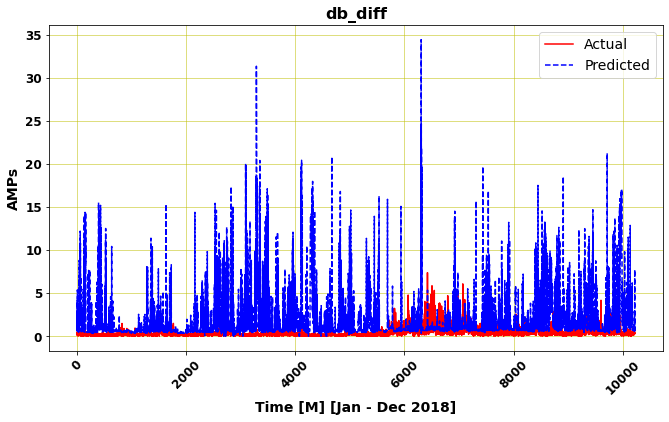

In [243]:
plt.figure(figsize=(11, 6))
plt.plot(y_actual, linestyle='solid', color='r')
plt.plot(y_hat, linestyle='dashed', color='b')
# plt.plot(y_actual, linestyle='solid', color='r')


plt.legend(['Actual','Predicted'], loc='best', prop={'size': 14})
plt.title('db_diff', weight='bold', fontsize=16)
plt.ylabel('AMPs', weight='bold', fontsize=14)
plt.xlabel('Time [M] [Jan - Dec 2018]', weight='bold', fontsize=14)
plt.xticks(weight='bold', fontsize=12, rotation=45)
plt.yticks(weight='bold', fontsize=12)
plt.grid(color = 'y', linewidth='0.5')
plt.show()

## ---------- Saving points

In [356]:

logdir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)
logdir

'logs\\20210817-165544'

In [358]:
# %tensorboard --logdir='C:\Users\cgree\Documents\logs\logs\20210816-141500'

In [359]:
# Load the TensorBoard notebook extension
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [354]:
import tensorflow as tf
import datetime, os

In [315]:
os.chdir(r'C:\Users\cgree\Documents\logs')

In [316]:
# %tensorboard dev upload --logdir \
#     'runs'

In [317]:
!rm -rf ./logs/ 

'rm' is not recognized as an internal or external command,
operable program or batch file.


In [319]:
# %tensorboard --port=600 --logdir \
#     'runs'

### Absolutly works
(CleanTF) C:\Users\cgree\Documents\logs\logs\20210816-141500>tensorboard --port=9007 --logdir=train

(CleanTF) C:\Users\cgree\Documents\logs\logs>tensorboard --port=9007 --logdir=20210816-141500


In [355]:
history = model.fit(x=X_train, y=y_train, batch_size=112, epochs=5, verbose=1, validation_data=(X_valid, y_valid), shuffle=True, callbacks=[tensorboard_callback])

Epoch 1/5
4118/4118 [==============================] - 8s 2ms/step - loss: 13.6409 - accuracy: 0.0041 - val_loss: 0.3370 - val_accuracy: 0.0125
Epoch 2/5
4118/4118 [==============================] - 8s 2ms/step - loss: 13.7070 - accuracy: 0.0034 - val_loss: 0.3115 - val_accuracy: 9.8875e-04
Epoch 3/5
4118/4118 [==============================] - 8s 2ms/step - loss: 13.6481 - accuracy: 0.0024 - val_loss: 0.9233 - val_accuracy: 0.0027
Epoch 4/5
4118/4118 [==============================] - 8s 2ms/step - loss: 13.5646 - accuracy: 0.0012 - val_loss: 0.2797 - val_accuracy: 6.5917e-04
Epoch 5/5
4118/4118 [==============================] - 8s 2ms/step - loss: 13.6669 - accuracy: 5.4426e-04 - val_loss: 0.3237 - val_accuracy: 4.5318e-04


# Plot GIC and db_diff

In [394]:
y_pred = model.predict(X_test)

In [395]:
# y_pred_rescaled = Target_scaler.inverse_transform(y_pred)

In [396]:
from sklearn.metrics import r2_score
# y_test_rescaled =  Target_scaler.inverse_transform(y_test_scaled)
score = r2_score(y_test, y_pred)
print('R-squared score for the test set:', round(score,4))

ValueError: y_true and y_pred have different number of output (1!=10)

In [397]:
test_array = np.array(y_test)

In [398]:
y_actual = pd.DataFrame(test_array, columns=['Actual GIC'])

y_hat = pd.DataFrame(y_pred, columns=['Predicted GIC'])

ValueError: Shape of passed values is (25550, 10), indices imply (25550, 1)

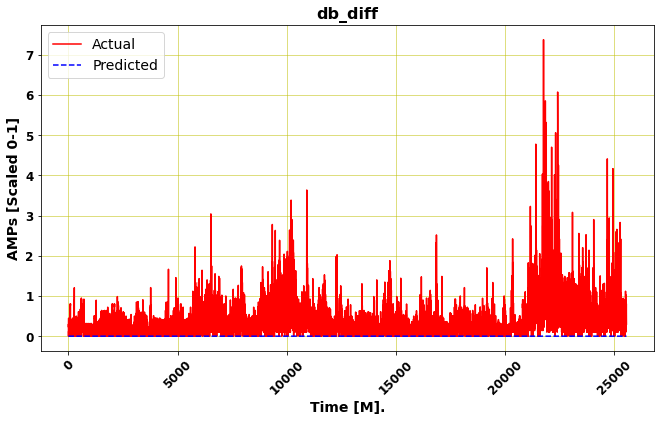

In [399]:
plt.figure(figsize=(11, 6))
plt.plot(y_actual, linestyle='solid', color='r')
plt.plot(y_hat, linestyle='dashed', color='b')
# plt.plot(y_actual, linestyle='solid', color='r')


plt.legend(['Actual','Predicted'], loc='best', prop={'size': 14})
plt.title('db_diff', weight='bold', fontsize=16)
plt.ylabel('AMPs [Scaled 0-1]', weight='bold', fontsize=14)
plt.xlabel('Time [M].', weight='bold', fontsize=14)
plt.xticks(weight='bold', fontsize=12, rotation=45)
plt.yticks(weight='bold', fontsize=12)
plt.grid(color = 'y', linewidth='0.5')
plt.show()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


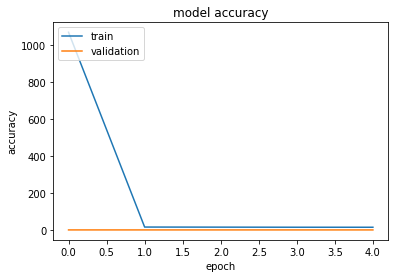

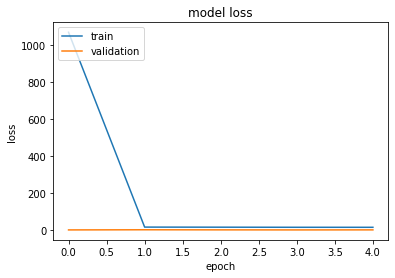

In [400]:
print(history.history.keys())
#  "Accuracy"
plt.plot(history.history['loss'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
#Unknown fit - Validation error low, training error 'high'

In [401]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

KeyError: 'acc'

<AxesSubplot:xlabel='Date_UTC'>

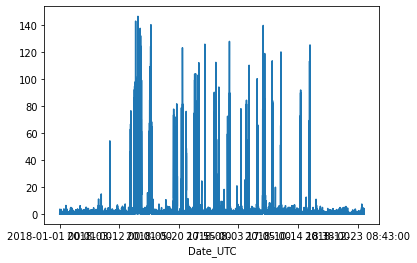

In [402]:
df.db_diff.plot()

In [38]:
from scipy.stats import norm

F:\Astra\conda2\envs\CleanTF\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


NameError: name 'stats' is not defined

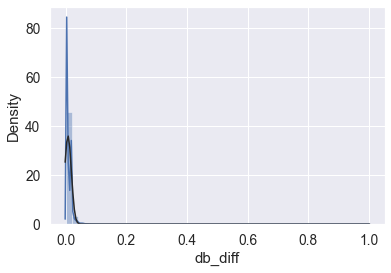

<Figure size 432x288 with 0 Axes>

In [39]:
#histogram and normal probability plot
sns.distplot(df['db_diff'], fit=norm);
fig = plt.figure()
res = stats.probplot(df1['db_diff'], plot=plt)

###### Something odd here let me go thought the 

In [ ]:
# from scipy import stats
# dfx = dfx[(np.abs(stats.zscore(dfx)) < 3).all(axis=1)] #3 standard deviations from mean

# # df.index = df['Datetime']
# # del df['Datetime']
# # df

In [50]:
dot_img_file = 'X:\\data_dumps\\tmp\\model_1.png'
plot_model(model, to_file=dot_img_file, show_shapes=True)

('Failed to import pydot. You must `pip install pydot` and install graphviz (https://graphviz.gitlab.io/download/), ', 'for `pydotprint` to work.')


In [49]:
# !pip install pydot

In [14]:
import seaborn as sns

<AxesSubplot:>

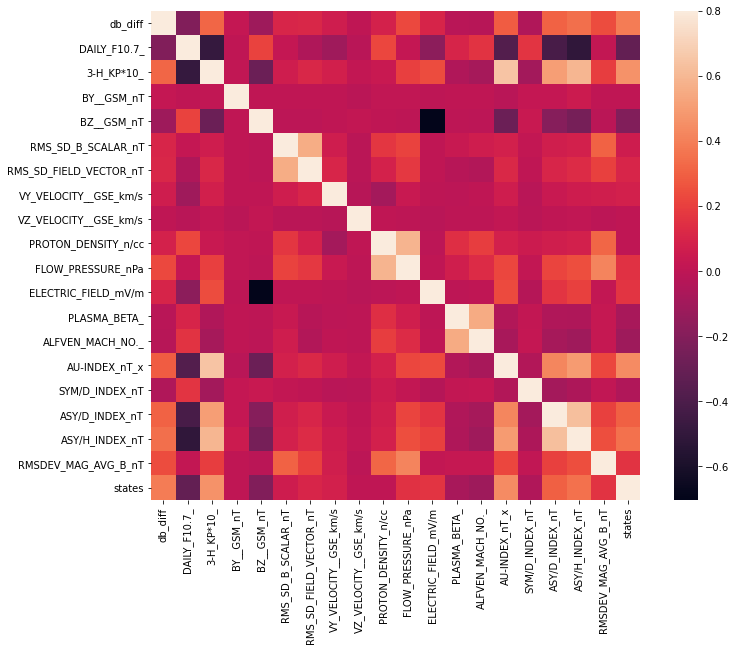

In [15]:
correlation_matrix = df.corr()
fig = plt.figure(figsize=(12,9))
sns.heatmap(correlation_matrix,vmax=0.8,square = True)
# plt.show()

In [16]:
correlation_matrix

,db_diff,DAILY_F10.7_,3-H_KP*10_,BY__GSM_nT,BZ__GSM_nT,RMS_SD_B_SCALAR_nT,RMS_SD_FIELD_VECTOR_nT,VY_VELOCITY__GSE_km/s,VZ_VELOCITY__GSE_km/s,PROTON_DENSITY_n/cc,FLOW_PRESSURE_nPa,ELECTRIC_FIELD_mV/m,PLASMA_BETA_,ALFVEN_MACH_NO._,AU-INDEX_nT_x,SYM/D_INDEX_nT,ASY/D_INDEX_nT,ASY/H_INDEX_nT,RMSDEV_MAG_AVG_B_nT,states
db_diff,1.000000,-0.212832,0.313494,0.020905,-0.114565,0.104973,0.112460,0.062616,0.007217,0.085012,0.227670,0.097243,-0.018466,-0.025155,0.283856,-0.046005,0.306265,0.342536,0.241715,0.385992
DAILY_F10.7_,-0.212832,1.000000,-0.487678,0.006133,0.211851,0.021955,-0.055139,-0.105384,-0.018558,0.220539,0.023877,-0.172380,0.097545,0.156676,-0.377408,0.165106,-0.416332,-0.514542,0.017053,-0.320970
3-H_KP*10_,0.313494,-0.487678,1.000000,0.012644,-0.289097,0.062637,0.109014,0.072011,0.014314,0.040776,0.200316,0.236620,-0.047913,-0.082500,0.647130,-0.094218,0.504367,0.591308,0.193231,0.462668
BY__GSM_nT,0.020905,0.006133,0.012644,1.000000,0.006335,0.002328,0.005297,0.003403,-0.010321,0.007834,0.012927,-0.003297,0.003048,0.003329,-0.017383,0.024030,0.023087,0.050343,0.006612,0.002465
BZ__GSM_nT,-0.114565,0.211851,-0.289097,0.006335,1.000000,-0.006518,-0.005280,0.002420,0.014481,0.005457,-0.001892,-0.703105,-0.001284,-0.004626,-0.288290,0.038236,-0.197943,-0.248597,-0.015011,-0.212027
RMS_SD_B_SCALAR_nT,0.104973,0.021955,0.062637,0.002328,-0.006518,1.000000,0.554742,0.064181,-0.011147,0.166767,0.212140,0.004980,0.035414,0.063840,0.078517,0.014188,0.069686,0.082667,0.305872,0.055791
RMS_SD_FIELD_VECTOR_nT,0.112460,-0.055139,0.109014,0.005297,-0.005280,0.554742,1.000000,0.104643,-0.013416,0.085375,0.177313,0.004156,-0.025161,-0.040579,0.115776,0.003437,0.106041,0.125912,0.203696,0.102467
VY_VELOCITY__GSE_km/s,0.062616,-0.105384,0.072011,0.003403,0.002420,0.064181,0.104643,1.000000,-0.022482,-0.088334,0.041725,-0.003003,-0.005865,0.002980,0.062351,-0.020839,0.040385,0.055730,0.068088,0.080151
VZ_VELOCITY__GSE_km/s,0.007217,-0.018558,0.014314,-0.010321,0.014481,-0.011147,-0.013416,-0.022482,1.000000,0.002511,0.000599,-0.017692,0.001110,-0.001093,0.013765,-0.010642,0.001523,0.011712,-0.007400,0.002513
PROTON_DENSITY_n/cc,0.085012,0.220539,0.040776,0.007834,0.005457,0.166767,0.085375,-0.088334,0.002511,1.000000,0.582934,-0.006652,0.141811,0.194466,0.080924,0.051078,0.071621,0.078084,0.312884,0.003226


In [17]:
# GSM similar to the GSE due to time delay. 


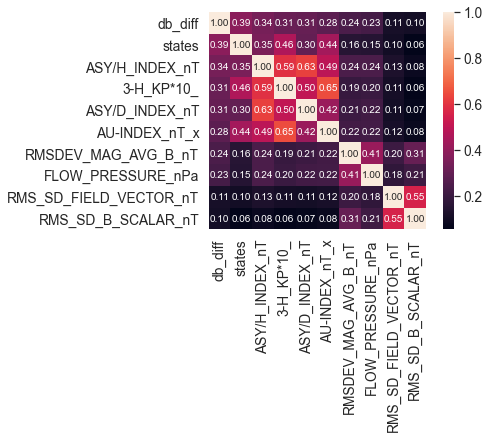

In [18]:
#target correlation matrix
k = 10 #number of variables for heatmap`ax
cols = correlation_matrix.nlargest(k, 'db_diff')['db_diff'].index
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [35]:
# !pip install statsmodels

### variables’ effect on the dependent variable

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std

In [20]:
 y_train,X_train

(0          0.000000
 1          0.000000
 2          0.001848
 3          0.000000
 4          0.000000
              ...   
 6958218    0.005845
 6958219    0.011835
 6958220    0.006664
 6958221    0.005545
 6958222    0.006664
 Name: db_diff, Length: 6958223, dtype: float64,
          DAILY_F10.7_  3-H_KP*10_  BY__GSM_nT  BZ__GSM_nT  RMS_SD_B_SCALAR_nT  \
 0            0.720000    0.030451    0.471264    0.500846            0.004937   
 1            0.720000    0.030451    0.480516    0.502799            0.000705   
 2            0.720000    0.030451    0.478694    0.500716            0.000000   
 3            0.720000    0.030451    0.478133    0.502929            0.001410   
 4            0.720000    0.030451    0.483459    0.507486            0.003526   
 ...               ...         ...         ...         ...                 ...   
 6958218      0.746667    0.440457    0.438183    0.483270            0.019746   
 6958219      0.746667    0.095160    0.442809    0.483791      

##### The F-statistic is blowing up 122300% , this should tell us the accuracy of the null hypthesis
###### - reject the null hypothesis with 95 percent confidence that the variance between the values isn't due to random chance

##### some of the variables are showing low signficiance (Electric_field,1AU_IP_FLOW_LAT_Deg, 1AU_IP_BX__GSE_nT, RMSDEV_TEMP_Deg_K )

In [21]:
#### Scaling may be an issue due to log scale. 

In [22]:
model = sm.OLS( y_train,X_train)
results = model.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                db_diff   R-squared (uncentered):                   0.486
Model:                            OLS   Adj. R-squared (uncentered):              0.486
Method:                 Least Squares   F-statistic:                          3.466e+05
Date:                Wed, 11 Aug 2021   Prob (F-statistic):                        0.00
Time:                        14:34:04   Log-Likelihood:                      2.2201e+07
No. Observations:             6958223   AIC:                                 -4.440e+07
Df Residuals:                 6958204   BIC:                                 -4.440e+07
Df Model:                          19                                                  
Covariance Type:            nonrobust                                                  
                             coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------

In [19]:
norm_x = X_test.values
for i, name in enumerate(X_test):
    if name == "const":
        continue
    norm_x[:,i] = X_test[name]/np.linalg.norm(X_test[name])
norm_xtx = np.dot(norm_x.T,norm_x)

In [20]:
eigs = np.linalg.eigvals(norm_xtx)
condition_number = np.sqrt(eigs.max() / eigs.min())
print(condition_number)

308.9186005887479


In [44]:
# results = sm.OLS(y_test.iloc[:14], X_test.iloc[:14]).fit()
# print("Percentage change %4.2f%%\n"*7 % tuple([i for i in (results.params - results.params)/results.params*100]))

In [11]:
print('Parameters: ', results.params)
print('R2: ', results.rsquared)

Parameters:  NO._IMF_AVG_                         -0.003261
NO._IP_PLASMA_AVG_                    0.001237
BX__GSE_nT                           -0.001283
BY__GSE_nT                           -0.001025
BZ__GSE_nT                           -0.002118
BY__GSM_nT                            0.000387
BZ__GSM_nT                            0.006216
RMS_SD_B_SCALAR_nT                    0.013343
RMS_SD_FIELD_VECTOR_nT                0.000589
VY_VELOCITY__GSE_km/s                 0.002158
VZ_VELOCITY__GSE_km/s                 0.000533
PROTON_DENSITY_n/cc                  -0.002967
TEMPERATURE_K                        -0.003153
NA/NP_RATIO_                          0.000284
FLOW_PRESSURE_nPa                     0.020508
ELECTRIC_FIELD_mV/m                  -0.000115
PLASMA_BETA_                         -0.007762
ALFVEN_MACH_NO._                      0.015739
Y_(S/C)__GSE_Re                      -0.000437
Z_(S/C)__GSE_Re                      -0.000188
Y_(BSN)__GSE_Re                       0.004252


In [13]:
print('Parameters: ', results.params)
print('Standard errors: ', results.bse)
print('Predicted values: ', results.predict())

Parameters:  NO._IMF_AVG_                         -0.003261
NO._IP_PLASMA_AVG_                    0.001237
BX__GSE_nT                           -0.001283
BY__GSE_nT                           -0.001025
BZ__GSE_nT                           -0.002118
BY__GSM_nT                            0.000387
BZ__GSM_nT                            0.006216
RMS_SD_B_SCALAR_nT                    0.013343
RMS_SD_FIELD_VECTOR_nT                0.000589
VY_VELOCITY__GSE_km/s                 0.002158
VZ_VELOCITY__GSE_km/s                 0.000533
PROTON_DENSITY_n/cc                  -0.002967
TEMPERATURE_K                        -0.003153
NA/NP_RATIO_                          0.000284
FLOW_PRESSURE_nPa                     0.020508
ELECTRIC_FIELD_mV/m                  -0.000115
PLASMA_BETA_                         -0.007762
ALFVEN_MACH_NO._                      0.015739
Y_(S/C)__GSE_Re                      -0.000437
Z_(S/C)__GSE_Re                      -0.000188
Y_(BSN)__GSE_Re                       0.004252


In [17]:
prstd, iv_l, iv_u = wls_prediction_std(results)

fig, ax = plt.subplots(figsize=(8,6))

ax.plot(X_test, y_test, 'o', label="data")
ax.plot(X_test, y_test, 'b-', label="True")
ax.plot(X_test, res.fittedvalues, 'r--.', label="OLS")
ax.plot(X_test, iv_u, 'r--')
ax.plot(X_test, iv_l, 'r--')
ax.legend(loc='best');

NameError: name 'res' is not defined

OverflowError: Exceeded cell block limit (set 'agg.path.chunksize' rcparam)

<Figure size 576x432 with 1 Axes>

In [ ]:
DAILY_F10.7_                         
3-H_KP*10_     
BY__GSM_nT
BZ__GSM_nT
RMS_SD_B_SCALAR_nT
RMS_SD_FIELD_VECTOR_nT
VY_VELOCITY__GSE_km/s
VZ_VELOCITY__GSE_km/s
PROTON_DENSITY_n/cc
FLOW_PRESSURE_nPa
ELECTRIC_FIELD_mV/m
PLASMA_BETA_
ALFVEN_MACH_NO._
AU-INDEX_nT_x
SYM/D_INDEX_nT
ASY/D_INDEX_nT
ASY/H_INDEX_nT        
RMSDEV_MAG_AVG_B_nT